In [1]:
import os
import pandas as pd
import patchworklib as pw
import numpy as np
import seaborn as sns
from plotnine import *
from plotnine.data import *
pw.overwrite_axisgrid()

<Figure size 72x72 with 0 Axes>

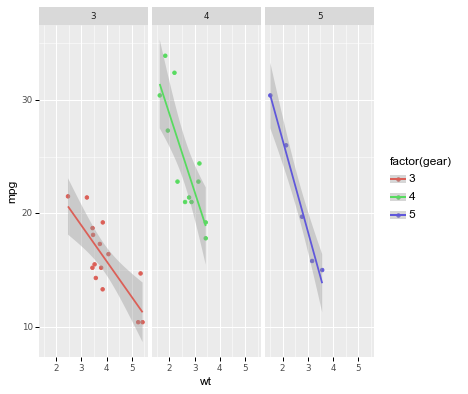

In [2]:
g1 = (ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))
g1 = pw.load_ggplot(g1, figsize=(6,6))
g1.savefig()

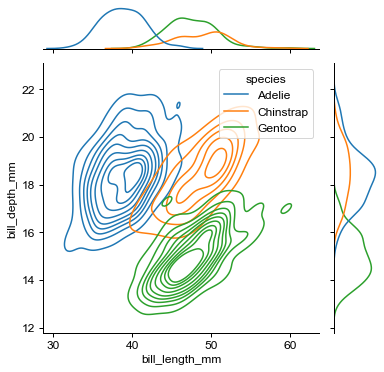

In [3]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g2 = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)
g2 = pw.load_seaborngrid(g2, figsize=(6,6), labels=["joint","marg_x","marg_y"])
g2.savefig()

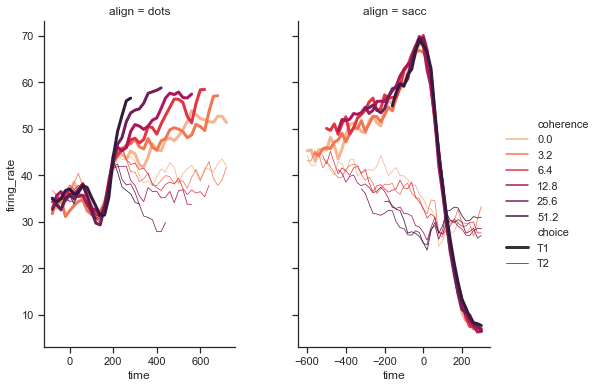

In [4]:
sns.set_theme(style="ticks")
dots = sns.load_dataset("dots")
palette = sns.color_palette("rocket_r")
g3 = sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)
g3 = pw.load_seaborngrid(g3, figsize=(8,6))
g3.savefig()

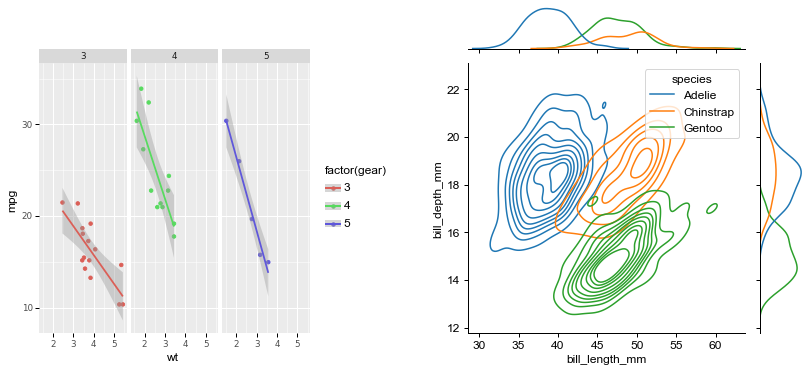

In [5]:
g12 = g1|g2["joint"]
g12.savefig()

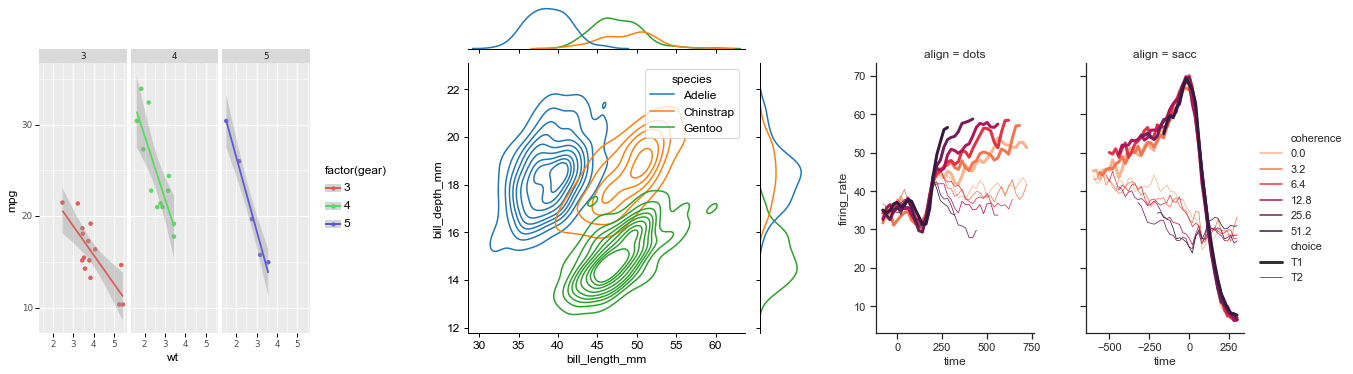

In [6]:
(g12["marg_y"]|g3).savefig()